<a href="https://colab.research.google.com/github/yuchenjohnlin/Mnist-on-EvaDB-and-DeepLake/blob/main/EvaDB_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --quiet "evadb[vision,notebook]"
import evadb
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.1/530.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

##Download mnist dataset in jpg provided at kaggle
Need to download a kaggle.json by clicking Create New API token at your  [account setting](https://www.kaggle.com/settings)

The *username* and *key* will be provided in the downloaded json file

In [ ]:
# go to place to store data  - can specify it yourself
import os
!pip install opendatasets
import opendatasets as od

dataset_folder = "/content"
os.chdir(dataset_folder)
od.download("https://www.kaggle.com/datasets/scolianni/mnistasjpg/data")
# will be required to input Kaggle username and
print(os.listdir())

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yuchenjohnlin
Your Kaggle Key: ··········


100%|██████████| 68.4M/68.4M [00:00<00:00, 155MB/s]



['.config', 'mnistasjpg']


In [ ]:
dataset_folder = './mnistasjpg'
cwd = os.getcwd()
print("Current working directory:", cwd)

trainset_folder = os.path.join(dataset_folder,'trainingSet/trainingSet')
class_names = [item for item in os.listdir(trainset_folder) if os.path.isdir(os.path.join(trainset_folder, item))]
print(class_names)


# Get only files in trainingSet
files_list = []
for dirpath, dirnames, filenames in os.walk(dataset_folder):
  #print("Dirpath : ", dirpath)
  #print("Dirname : ", dirnames)
  if dirpath.startswith(os.path.join(dataset_folder, 'trainingSet')) and os.path.basename(dirpath) in ['3','1','2','4','5','6','7','8','9']: #,'testSet', 'testSample']:
    #print('yes')
    print("Dirpath : ", dirpath)
    for filename in filenames:
      #print("filename : ", filename)
      files_list.append(os.path.join(dirpath, filename))
  #else:
  #  print('no')
print(files_list)
print(len(files_list))

Current working directory: /content
['8', '9', '1', '6', '4', '3', '0', '2', '7', '5']
Dirpath :  ./mnistasjpg
Dirpath :  ./mnistasjpg/testSet
Dirpath :  ./mnistasjpg/testSet/testSet
Dirpath :  ./mnistasjpg/testSample
Dirpath :  ./mnistasjpg/testSample/testSample
Dirpath :  ./mnistasjpg/trainingSample
Dirpath :  ./mnistasjpg/trainingSample/trainingSample
Dirpath :  ./mnistasjpg/trainingSample/trainingSample/8
Dirpath :  ./mnistasjpg/trainingSample/trainingSample/9
Dirpath :  ./mnistasjpg/trainingSample/trainingSample/1
Dirpath :  ./mnistasjpg/trainingSample/trainingSample/6
Dirpath :  ./mnistasjpg/trainingSample/trainingSample/4
Dirpath :  ./mnistasjpg/trainingSample/trainingSample/3
Dirpath :  ./mnistasjpg/trainingSample/trainingSample/0
Dirpath :  ./mnistasjpg/trainingSample/trainingSample/2
Dirpath :  ./mnistasjpg/trainingSample/trainingSample/7
Dirpath :  ./mnistasjpg/trainingSample/trainingSample/5
Dirpath :  ./mnistasjpg/trainingSet
Dirpath :  ./mnistasjpg/trainingSet/trainingSet

#Load data into EvaDB

In [ ]:
import time

cursor = evadb.connect().cursor()

cursor.query("DROP TABLE IF EXISTS MNIST_image").df()

load_data_start = time.time()

# if the file is already in the table it will show an error
for file in files_list:
  #print(file)
  cursor.query(f"LOAD IMAGE '{file}' INTO MNIST_image").df()

load_data_end = time.time()
load_data_time = load_data_end - load_data_start
print(f"Load data_time : {load_data_time} seconds")

Load data_time : 2935.8475654125214 seconds


#Query search

In [ ]:
uery_time_start = time.time()
query = cursor.query("""
    SELECT data, MnistImageClassifier(data).label
    FROM MNIST_image
    WHERE MnistImageClassifier(data).label = '6'
""")

response = query.df()

query_time_end = time.time()
query_time = query_time_end - query_time_start
print(f"Query data time : {query_time} seconds")

Query data time : 1238.7712452411652 seconds


#Print result of query - Still working

                                       mnist_image.data  \
0     [[[0, 0, 0], [3, 3, 3], [6, 6, 6], [1, 1, 1], ...   
1     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
2     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
3     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
4     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
...                                                 ...   
4135  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
4136  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
4137  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
4138  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   
4139  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...   

     mnistimageclassifier.label  
0                             6  
1                             6  
2                             6  
3                             6  
4                             6  
...                         ...  
4135                          6  
4136               

KeyError: ignored

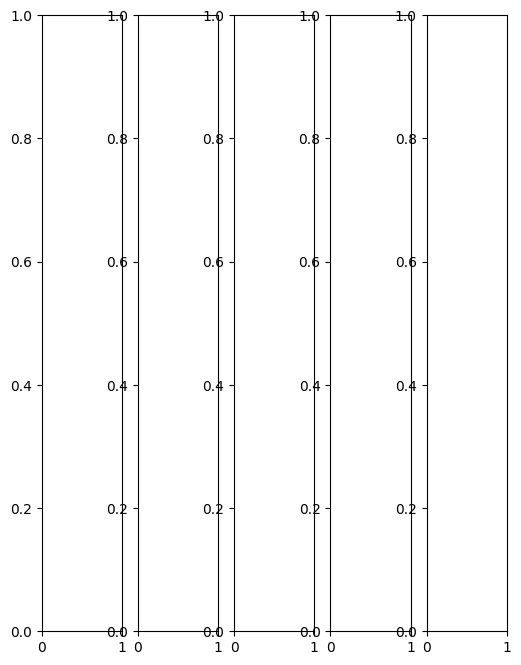

In [ ]:
# !pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=[6,8])
print(response)

for axi in ax.flat:
    idx = np.random.randint(len(response))
    img = response['image'].iloc[idx]
    label = response['label'].iloc[idx]
    axi.imshow(img)

    axi.set_title(f'label: {label}')

plt.show()

##Approach Failures ! - Don't run

##Downloading Mnist Dataset from pytorch and using its dataloader
Problem :

Evadb doesn't read in the PIL images -> so look for jpg datasets that can be loaded into Evadb to use the built in mnistclassifier

Mistakes :

I didn't know that the most of the mnist dataset online are from the same source [mnist dataset](http://yann.lecun.com/exdb/mnist/index.html)  so I thought manually downloading andusing the pytorch or other datasets wil be different

In [ ]:
import torch
print(torch.__version__)
import torchvision
import torchvision.datasets as datasets

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)
print(len(mnist_trainset))
print(len(mnist_testset))

In [ ]:
from PIL import Image
train_image_zero, train_target_zero = mnist_trainset[0]
display(train_image_zero)
print("Image of dataset is : " , type(train_image_zero))
print(train_target_zero)
print("Label data type is : ", type(train_target_zero))

#cursor.query("LOAD IMAGE 'reddit-images/*.jpg' INTO reddit_dataset").execute()
"""
for test_image,test_target in mnist_testset:
  cursor.query("LOAD IMAGE 'test_image' INTO MNIST_image").df()
  display(test_image)
  print(test_target)
"""
# load_multimedia_executor.py in evadb doesn't support a non file input

Image of dataset is :  <class 'PIL.Image.Image'>
5
Label data type is :  <class 'int'>


'\nfor test_image,test_target in mnist_testset:\n  cursor.query("LOAD IMAGE \'test_image\' INTO MNIST_image").df()\n  display(test_image)\n  print(test_target)\n'

Failed to download using kaggle

In [ ]:

"""
!pip install -q kaggle
from google.colab import files
# upload the kaggle.json file
files.upload()
"""
# have to upload the kaggle.json file
"""
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using Kaggle API -> this part doesn't work
!kaggle datasets download -d scolianni/mnistasjpg -f trainingSet.tar.gz
!kaggle datasets download -d scolianni/mnistasjpg -f testSet.tar.gz
!kaggle datasets download -d scolianni/mnistasjpg -f trainingSample.zip
!kaggle datasets download -d scolianni/mnistasjpg -f testSample.zip
!kaggle datasets list
                              """
# The !kaggle datasets download cannot find the dataset

Skipping, found downloaded files in "./mnistasjpg" (use force=True to force download)
['.config', 'yolov8m.pt', 'mnistasjpg', 'evadb_data', 'data', 'sample_data']


## Downloading dataset using urllib and decompressing using gzip
Problem :
This will result in an error that says the decompressed file is cannot be read because
utf-8' codec can't decode byte 0xb9 in position 219: invalid start byte
Manually downloading is not an efficient way when there are a lot of data loaders online

In [ ]:
import os
import gzip
import urllib.request
import shutil

# URL of the gzip file you want to download
url_image = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
url_label = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'

# Path to save the downloaded gzip file
gzip_image_path = '/content/image.gz'
gzip_label_path = '/content/label.gz'

# Path to save the decompressed file
output_image_path = '/content/decompressed_image.txt'
output_label_path = '/content/decompressed_label.txt'

# Download the gzip file
urllib.request.urlretrieve(url_image, gzip_image_path)
urllib.request.urlretrieve(url_label, gzip_label_path)

# Decompress the gzip file
with gzip.open(gzip_image_path, 'rb') as f_in:
    with open(output_image_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Check the content of the decompressed file
with open(output_image_path, 'r') as f:
    content = f.read()
try:
    decoded_content = content.decode('utf-8')
except UnicodeDecodeError as e:
    print(f"Error: {e}")
    problematic_byte = content[e.start:e.end]
    print(f"Problematic Byte: {problematic_byte}")

    print(content)


# Decompress the gzip file
with gzip.open(gzip_label_path, 'rb') as f_in:
    with open(output_label_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Check the content of the decompressed file
with open(output_label_path, 'r') as f:
    content = f.read()
    print(content)



UnicodeDecodeError: ignored